In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Dropout, Conv1D, MaxPooling1D, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras import losses
from keras.optimizers import SGD, Adam
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
from keras.datasets import mnist
((xtrain,ytrain),(xtest, ytest)) = mnist.load_data()

In [3]:
'''
test = pd.read_csv('D:\Documents\Codes\VisualStudioProjects\DATASETS\mnist\mnist_test.csv')
train = pd.read_csv("D:\Documents\Codes\VisualStudioProjects\DATASETS\mnist\mnist_train.csv")

mnist = pd.concat([train,test])
x = mnist.drop(['label'],axis=1).values
y = mnist['label'].values
xtrain, xtest, ytrain, ytest = train_test_split(x,y , test_size=0.2)

xtrain = xtrain.reshape(xtrain.shape[0], 28, 28, 1)
xtest = xtest.reshape(xtest.shape[0], 28, 28, 1)
'''

'\ntest = pd.read_csv(\'D:\\Documents\\Codes\\VisualStudioProjects\\DATASETS\\mnist\\mnist_test.csv\')\ntrain = pd.read_csv("D:\\Documents\\Codes\\VisualStudioProjects\\DATASETS\\mnist\\mnist_train.csv")\n\nmnist = pd.concat([train,test])\nx = mnist.drop([\'label\'],axis=1).values\ny = mnist[\'label\'].values\nxtrain, xtest, ytrain, ytest = train_test_split(x,y , test_size=0.2)\n\nxtrain = xtrain.reshape(xtrain.shape[0], 28, 28, 1)\nxtest = xtest.reshape(xtest.shape[0], 28, 28, 1)\n'

In [4]:
xtrain = xtrain.astype('float32')/255.0
xtest = xtest.astype('float32')/255.0

In [5]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

In [6]:
model.compile(loss=losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=Adam(), metrics=['accuracy'])

In [7]:
H= model.fit(xtrain, ytrain, epochs=5, validation_data=[xtest,ytest])

Epoch 1/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1451 - accuracy: 0.9557 - val_loss: 0.0564 - val_accuracy: 0.9826
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0457 - accuracy: 0.9857 - val_loss: 0.0478 - val_accuracy: 0.9845
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0333 - accuracy: 0.9898 - val_loss: 0.0303 - val_accuracy: 0.9905
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0246 - accuracy: 0.9922 - val_loss: 0.0270 - val_accuracy: 0.9923
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0195 - accuracy: 0.9939 - val_loss: 0.0270 - val_accuracy: 0.9927


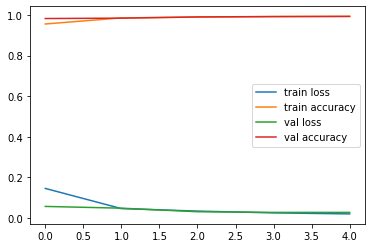

In [8]:
plt.figure()
plt.plot(np.arange(0,5), H.history['loss'], label='train loss')
plt.plot(np.arange(0,5), H.history['accuracy'], label='train accuracy')
plt.plot(np.arange(0,5), H.history['val_loss'], label='val loss')
plt.plot(np.arange(0,5), H.history['val_accuracy'], label='val accuracy')
plt.legend()

1/1 [==============================] - 0s 201ms/step
1


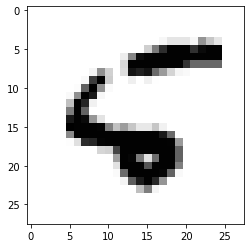

In [9]:
index = 8
plt.imshow(xtest[index], cmap='Greys')
labels = ['0','1','2','3','4','5','6','7','8','9']
arr = np.array(xtrain[index])
img = arr.reshape(1,28,28,1)
pred = labels[model.predict(img).argmax()]
print(pred)